In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Satellite_data_wo_duplicates.xlsx')
df.head()

,Users,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Expected Lifetime (yrs.)
0,Commercial,Earth Observation,LEO,Non-Polar Inclined,0.0,566.0,576.0,0.001510,36.90,96.08,22.0,NaN,NaN,0.5
1,Commercial,Earth Observation,LEO,Sun-Synchronous,0.0,637.0,654.0,0.001510,98.00,95.00,4.0,4,NaN,NaN
2,Civil,Technology Development,LEO,Sun-Synchronous,0.0,497.0,517.0,0.001450,97.45,94.70,4.5,NaN,4.5,2.0
3,Civil,Earth Observation,LEO,Sun-Synchronous,0.0,442.0,687.0,0.001510,98.20,95.90,1.0,NaN,NaN,NaN
4,Commercial,Communications,GEO,NaN,75.0,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,NaN,16000,15.0


In [ ]:
# df.to_excel('sat_data.xlsx')

In [ ]:
df.columns

Index(['Users', 'Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Expected Lifetime (yrs.)'],
      dtype='object')

In [ ]:
df = df[['Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Expected Lifetime (yrs.)']]

In [ ]:
df.shape

(7553, 11)

In [ ]:
(df.duplicated() == True).sum()

4869

In [ ]:
df['Purpose'].unique()

array(['Earth Observation', 'Technology Development', 'Communications',
       'Earth Science', 'Space Science',
       'Space Science/Technology Demonstration',
       'Communications/Technology Development',
       'Communications/Maritime Tracking', 'Technology Demonstration',
       'Unknown', 'Navigation/Global Positioning',
       'Earth Observation/Technology Development', 'Earth Observation ',
       'Earth Observation/Communications', 'Earth/Space Observation',
       'Educational', 'Earth Observation/Earth Science', 'Platform',
       'Earth Observation/Space Science', 'Earth Observation/Navigation',
       'Communications/Navigation', 'Space Observation', 'Surveillance',
       'Navigation/Regional Positioning',
       'Space Science/Technology Development',
       'Mission Extension Technology', 'Earth Science/Earth Observation',
       'Earth Observation/Communications/Space Science', 'Meteorological',
       'Technology Development/Educational', 'Satellite Positioning'],


Deleting the pourpose name that had an '/' in them.

In [ ]:
df['Purpose'].apply(lambda x: '/' in x).sum()

195

In [ ]:
 df['Purpose'] = df['Purpose'].apply(lambda x: x.split('/')[0] if '/' in x else x)

In [ ]:
df['Purpose'].apply(lambda x: '/' in x).sum()

0

In [ ]:
df['Purpose'].unique()

array(['Earth Observation', 'Technology Development', 'Communications',
       'Earth Science', 'Space Science', 'Technology Demonstration',
       'Unknown', 'Navigation', 'Earth Observation ', 'Earth',
       'Educational', 'Platform', 'Space Observation', 'Surveillance',
       'Mission Extension Technology', 'Meteorological',
       'Satellite Positioning'], dtype=object)

In [ ]:
[print(str(str(x) + ': ' + str(df[df['Class of Orbit'] == x].shape[0]))) for x in df['Class of Orbit'].unique()]

LEO: 6760
GEO: 590
Elliptical: 59
MEO: 143
LEo: 1


[None, None, None, None, None]

In [ ]:
 df['Class of Orbit'] = df['Class of Orbit'].apply(lambda x: 'LEO' if x == 'LEo' in x else x)

In [ ]:
[print(str(str(x) + ': ' + str(df[df['Class of Orbit'] == x].shape[0]))) for x in df['Class of Orbit'].unique()]

LEO: 6761
GEO: 590
Elliptical: 59
MEO: 143


[None, None, None, None]

In [ ]:
[print(str(str(x) + ': ' + str(df[df['Type of Orbit'] == x].shape[0]))) for x in df['Type of Orbit'].unique()]

Non-Polar Inclined: 4035
Sun-Synchronous: 1692
nan: 0
Equatorial: 38
Polar: 1096
Elliptical: 5
Deep Highly Eccentric: 9
Molniya: 23
Retrograde: 1
Cislunar: 1
Sun-Synchronous near polar: 2


[None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
df['Type of Orbit'].unique()

array(['Non-Polar Inclined', 'Sun-Synchronous', nan, 'Equatorial',
       'Polar', 'Elliptical', 'Deep Highly Eccentric', 'Molniya',
       'Retrograde', 'Cislunar', 'Sun-Synchronous near polar'],
      dtype=object)

In [ ]:
df.dtypes

Purpose                        object
Class of Orbit                 object
Type of Orbit                  object
Longitude of GEO (degrees)    float64
Perigee (km)                  float64
Apogee (km)                   float64
Eccentricity                  float64
Inclination (degrees)         float64
Period (minutes)              float64
Launch Mass (kg.)             float64
Expected Lifetime (yrs.)      float64
dtype: object

In [ ]:
df.isna().sum()

Purpose                          0
Class of Orbit                   0
Type of Orbit                  651
Longitude of GEO (degrees)       3
Perigee (km)                     7
Apogee (km)                      7
Eccentricity                    11
Inclination (degrees)            4
Period (minutes)                56
Launch Mass (kg.)              245
Expected Lifetime (yrs.)      2110
dtype: int64

In [ ]:
df.columns

Index(['Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Expected Lifetime (yrs.)'],
      dtype='object')

In [ ]:
df['Launch Mass (kg.)'] = df.groupby('Purpose')['Launch Mass (kg.)'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df['Longitude of GEO (degrees)'] = df.groupby('Purpose')['Longitude of GEO (degrees)'].transform(lambda x: x.fillna(x.mean()))
df['Perigee (km)'] = df.groupby('Purpose')['Perigee (km)'].transform(lambda x: x.fillna(x.mean()))
df['Apogee (km)'] = df.groupby('Purpose')['Apogee (km)'].transform(lambda x: x.fillna(x.mean()))
df['Eccentricity'] = df.groupby('Purpose')['Eccentricity'].transform(lambda x: x.fillna(x.mean()))
df['Inclination (degrees)'] = df.groupby('Purpose')['Launch Mass (kg.)'].transform(lambda x: x.fillna(x.mean()))
df['Period (minutes)'] = df.groupby('Purpose')['Launch Mass (kg.)'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isna().sum()

Purpose                          0
Class of Orbit                   0
Type of Orbit                  651
Longitude of GEO (degrees)       0
Perigee (km)                     0
Apogee (km)                      0
Eccentricity                     0
Inclination (degrees)            0
Period (minutes)                 0
Launch Mass (kg.)                0
Expected Lifetime (yrs.)      2110
dtype: int64

In [ ]:
data = df

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Purpose                       0
Class of Orbit                0
Type of Orbit                 0
Longitude of GEO (degrees)    0
Perigee (km)                  0
Apogee (km)                   0
Eccentricity                  0
Inclination (degrees)         0
Period (minutes)              0
Launch Mass (kg.)             0
Expected Lifetime (yrs.)      0
dtype: int64

In [ ]:
df.shape

(4911, 11)

In [ ]:
df.columns

Index(['Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Expected Lifetime (yrs.)'],
      dtype='object')

In [ ]:
df['Type of Orbit'].unique()

array(['Non-Polar Inclined', 'Sun-Synchronous', 'Equatorial',
       'Elliptical', 'Deep Highly Eccentric', 'Polar', 'Molniya',
       'Cislunar'], dtype=object)

In [ ]:
# df.to_excel('Satellite_cleaned.xlsx')

In [ ]:
df.corr(numeric_only = True)

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.)
Longitude of GEO (degrees),1.000000,0.210777,0.160505,-0.001952,0.093927,0.093927,0.093927,0.088650
Perigee (km),0.210777,1.000000,0.776164,-0.010008,0.687683,0.687683,0.687683,0.809180
Apogee (km),0.160505,0.776164,1.000000,-0.006755,0.558191,0.558191,0.558191,0.637652
Eccentricity,-0.001952,-0.010008,-0.006755,1.000000,-0.011722,-0.011722,-0.011722,0.051105
Inclination (degrees),0.093927,0.687683,0.558191,-0.011722,1.000000,1.000000,1.000000,0.680279
Period (minutes),0.093927,0.687683,0.558191,-0.011722,1.000000,1.000000,1.000000,0.680279
Launch Mass (kg.),0.093927,0.687683,0.558191,-0.011722,1.000000,1.000000,1.000000,0.680279
Expected Lifetime (yrs.),0.088650,0.809180,0.637652,0.051105,0.680279,0.680279,0.680279,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

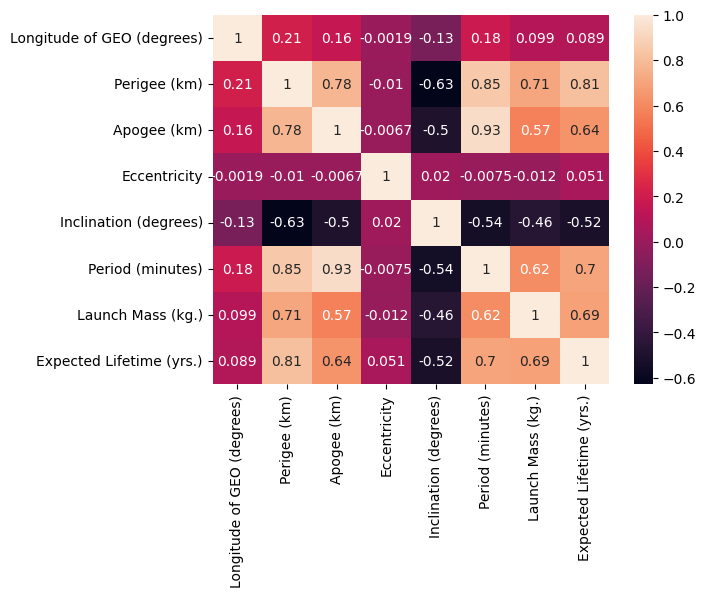

In [ ]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

Test Area:

In [ ]:
datf = pd.DataFrame({'a':['1','nan','3','4 AB','32,000'], 'b':[0,9,8,7,6]})

In [ ]:
datf.dtypes

a    object
b     int64
dtype: object

In [ ]:
datf.head()

,a,b
0,1,0
1,nan,9
2,3,8
3,4 AB,7
4,"32,000",6


In [ ]:
(lambda x: int(x.replace(',', '')) if ',' in x else int(x))('32,000')

32000

In [ ]:
# Convert 'salary' column to integers
datf['a'] = datf['a'].apply(lambda x: int(x.replace(',', '')) if ',' in x else int(x))
datf.head()

,a,b
0,1,0
1,2,9
2,3,8
3,4,7
4,32000,6


In [ ]:
def convert(x):
  if ',' in x:
    return int(x.replace(',', ''))
  else:
    return int(x)

In [ ]:
datf['a'].apply(convert)

0        1
1        2
2        3
3        4
4    32000
Name: a, dtype: int64

In [ ]:
(lambda x,y : f"{x} is smaller than {y}" if x < y else (f"{x} is greater than {y}" if x > y
               else f"{x} is equal to {y}"))(12,13)

'12 is smaller than 13'

In [ ]:
# Function to convert to integer, handling special cases
def convert_to_int(x):
    try:
        # Try converting to integer
        return int(x)
    except ValueError:
        try:
            # Try converting after removing non-numeric characters
            return int(''.join(filter(str.isdigit, x)))
        except ValueError:
            # Return NaN if conversion is not possible
            return float('nan')

# Convert 'a' column to integers
datf['a'] = datf['a'].apply(convert_to_int)

# Print the DataFrame to verify the changes
datf.head()

,a,b
0,1.0,0
1,NaN,9
2,3.0,8
3,4.0,7
4,32000.0,6


In [ ]:
datf = pd.DataFrame({'a':[1,2,3,4,5], 'b':[0,9,8,7,6]})

In [ ]:
datf['a'] = datf['a'].apply(lambda x: 'Earth' if 2 == x else x)

In [ ]:
datf.head()

,a,b
0,1,0
1,Earth,9
2,3,8
3,4,7
4,5,6


In [ ]:
tf = pd.DataFrame({'a':['vlah/', 'blah']})
tf.head()

,a
0,vlah/
1,blah


In [ ]:
'val/'.split('/')[0]

'val'

In [ ]:
tf['a'] = tf['a'].apply(lambda x: x.split('/')[0] if '/' in x else x)

In [ ]:
tf['a']

0    vlah
1    blah
Name: a, dtype: object

In [ ]:
tf = pd.DataFrame({'a':['a', 'a', 'a','b','b','c','a/c', 'a/b'], 'b':[1,2,3,5,6,4,2,1]})
tf

,a,b
0,a,1.0
1,a,2.0
2,a,3.0
3,b,5.0
4,b,6.0
5,c,4.0
6,a,2.0
7,a,NaN


In [ ]:
tf.groupby('a')

In [ ]:
means = tf.groupby('a')['b'].mean()
means

a
a    2.0
b    5.5
c    4.0
Name: b, dtype: float64

Replacing means wrt to classes

In [ ]:
tf['b'] = tf.groupby('a')['b'].transform(lambda x: x.fillna(x.mean()))
tf

,a,b
0,a,1.0
1,a,2.0
2,a,3.0
3,b,5.0
4,b,6.0
5,c,4.0
6,a,2.0
7,a,2.0


In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'a':['a', 'a', 'a','b','b','c','a/c', 'a/b'], 'b':[1,2,3,5,6,4,2,1]})

# Function to correct class names based on column 'b' values
def correct_class(row):
    if '/' in row['a']:
        parts = row['a'].split('/')
        if row['b'] in parts:
            return row['b']
    return row['a']

# Apply correction to DataFrame
df['a'] = df.apply(correct_class, axis=1)

# Display corrected DataFrame
print(df)

     a  b
0    a  1
1    a  2
2    a  3
3    b  5
4    b  6
5    c  4
6  a/c  2
7  a/b  1


In [ ]:
datf = pd.DataFrame({'a':[1,2,3,4,5], 'b':[0,9,8,7,6]})

In [ ]:
datf.dtypes

a    object
b     int64
dtype: object

In [ ]:
datf['a'] = str(datf['a'])